# 2440016804 - Rio Pramana - LA01 - Assignment 5

#### Import libraries and load dataset

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset, downloaded file is in the same folder
csv_path = "Social_Network_Ads.csv"
SNA_df = pd.read_csv(csv_path)

#### Check dataset (Shape, Info)

In [3]:
SNA_df.shape

(400, 3)

In [4]:
SNA_df.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [5]:
SNA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


No missing data and anomaly of the data type found

#### Data Summarization

In [6]:
SNA_df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


#### Extracting independent and dependent variables

In [7]:
#Extracting independent variables:
x = SNA_df.iloc[:, :-1].values #Extract semua kolom kecuali kolom terakhir
print(x)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [8]:
#Extracting dependent variable:
y = SNA_df.iloc[:, 2].values #Extract kolom terakhir
print(y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


#### Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)
X

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

#### Splitting dataset into Training set and Test set

With 400 data, I decided to split the dataset into 3:1 ratio (Training set contains 300 data, Test set contains 100 data)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (300, 2) (300,)
Test set:  (100, 2) (100,)


Create classifier using Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver = 'liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

## Predict Purchased (1) or Not Purchased (0)

In [12]:
#Predict using test set
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [13]:
#Predict probability for each class
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.61071527, 0.38928473],
       [0.59481337, 0.40518663],
       [0.57875015, 0.42124985],
       [0.62618269, 0.37381731],
       [0.62773323, 0.37226677],
       [0.75730282, 0.24269718],
       [0.72989984, 0.27010016],
       [0.42703227, 0.57296773],
       [0.76141118, 0.23858882],
       [0.50636133, 0.49363867],
       [0.68172416, 0.31827584],
       [0.69103094, 0.30896906],
       [0.59607312, 0.40392688],
       [0.52907959, 0.47092041],
       [0.71515003, 0.28484997],
       [0.52799194, 0.47200806],
       [0.55202425, 0.44797575],
       [0.7261002 , 0.2738998 ],
       [0.25786828, 0.74213172],
       [0.67960291, 0.32039709],
       [0.63345966, 0.36654034],
       [0.30955792, 0.69044208],
       [0.55899908, 0.44100092],
       [0.38163704, 0.61836296],
       [0.77854369, 0.22145631],
       [0.29525288, 0.70474712],
       [0.63244561, 0.36755439],
       [0.6350358 , 0.3649642 ],
       [0.58218968, 0.41781032],
       [0.59051895, 0.40948105],
       [0.

## Visualising the Training and Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


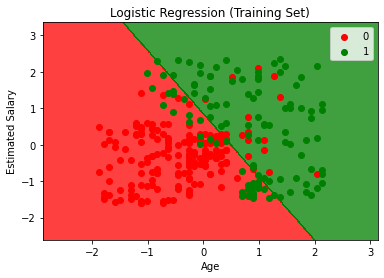

In [14]:
from matplotlib.colors import ListedColormap

x1, x2 = np.meshgrid(np.arange(start = X_train[:, 0].min()-1, stop = X_train[:, 0].max()+1, step = 0.01),
                    np.arange(start = X_train[:, 1].min()-1, stop = X_train[:, 1].max()+1, step = 0.01))

plt.contourf(x1, x2, LR.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
                                alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1],
    c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Logistic Regression (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


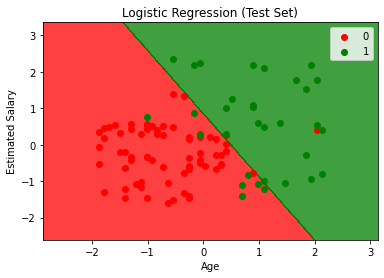

In [15]:
x1, x2 = np.meshgrid(np.arange(start = X_test[:, 0].min()-1, stop = X_test[:, 0].max()+1, step = 0.01),
                    np.arange(start = X_test[:, 1].min()-1, stop = X_test[:, 1].max()+1, step = 0.01))

plt.contourf(x1, x2, LR.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
                                alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test == j, 0], X_test[y_test == j, 1],
    c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Logistic Regression (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

plt.legend()
plt.show()

## Evaluation

#### Jaccard Index

In [16]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.7058823529411765

#### Confusion Matrix

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, yhat)
conf_matrix

array([[66,  2],
       [ 8, 24]], dtype=int64)

<AxesSubplot:>

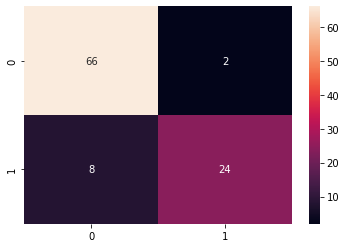

In [18]:
sns.heatmap(conf_matrix, annot=True)

#### Classification Report

In [19]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



Average accuracy = average of f1-score = __0.90__

#### Log Loss

In [20]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.479816705064194